In [3]:
import numpy as np
import matplotlib.pyplot as plt
import random

def initialize_grid(n, blue_ratio=0.45, red_ratio=0.45, empty_ratio=0.1):
    cells = ["blue"] * int(n * n * blue_ratio) + ["red"] * int(n * n * red_ratio) + ["empty"] * int(n * n * empty_ratio)
    random.shuffle(cells)
    grid = np.array(cells).reshape(n, n)
    return grid

def is_happy(grid, x, y, happy_neighbors=2):
    cell = grid[x, y]
    if cell == "empty":
        return True

    same_color_neighbors = 0
    for dx in [-1, 0, 1]:
        for dy in [-1, 0, 1]:
            if dx == 0 and dy == 0:
                continue
            nx, ny = x + dx, y + dy
            if 0 <= nx < grid.shape[0] and 0 <= ny < grid.shape[1] and grid[nx, ny] == cell:
                same_color_neighbors += 1

    return same_color_neighbors >= happy_neighbors

def find_unhappy_cell(grid, happy_neighbors=2):
    n = grid.shape[0]
    unhappy_cells = [(x, y) for x in range(n) for y in range(n) if not is_happy(grid, x, y, happy_neighbors) and grid[x, y] != "empty"]
    return random.choice(unhappy_cells) if unhappy_cells else None

def find_empty_cell(grid):
    empty_cells = [(x, y) for x in range(grid.shape[0]) for y in range(grid.shape[1]) if grid[x, y] == "empty"]
    return random.choice(empty_cells) if empty_cells else None

def simulate(grid, iters, step, happy_neighbors = 2):
    for it in range(iters):
        unhappy_cell = find_unhappy_cell(grid, happy_neighbors)
        if unhappy_cell is None:
            print("NO UNHAPPY CELLS")
            plot_grid(grid, title="NO UNHAPPY CELLS")
            break

        empty_cell = find_empty_cell(grid)
        if empty_cell:
            grid[empty_cell], grid[unhappy_cell] = grid[unhappy_cell], "empty"

        if it % step == 0 or it == iters - 1:
            plot_grid(grid, title=f"Step {it}")

def plot_grid(grid, title=""):
    color_map = {"blue": 1, "red": -1, "empty": 0.1}
    mapped_grid = np.vectorize(color_map.get)(grid)
    plt.imshow(mapped_grid, cmap="jet", interpolation="nearest")
    plt.title(title)
    plt.axis("off")
    plt.show()


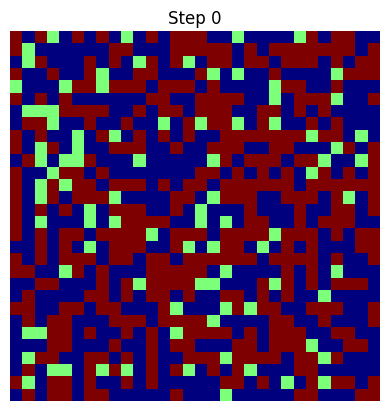

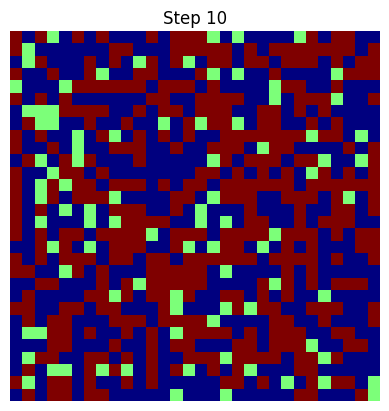

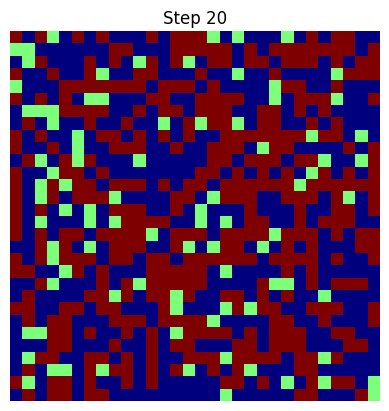

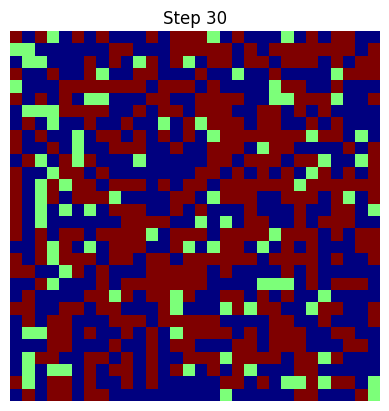

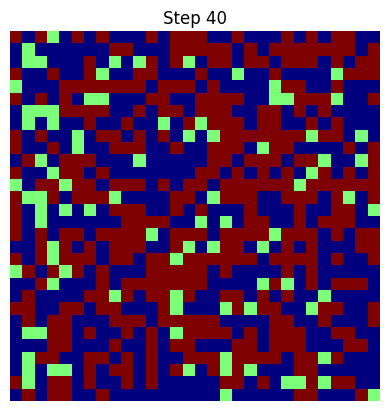

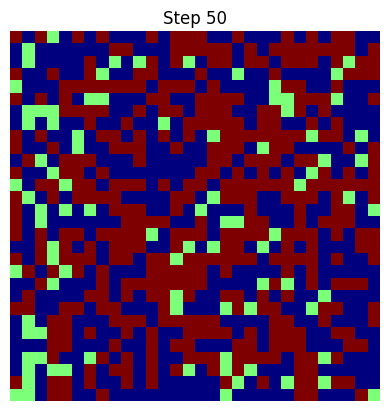

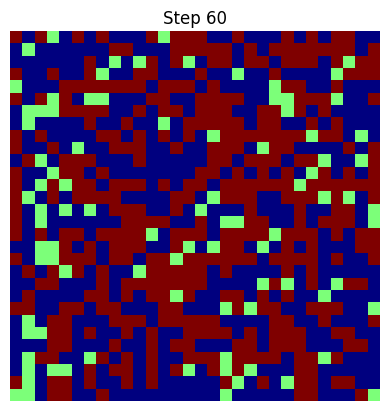

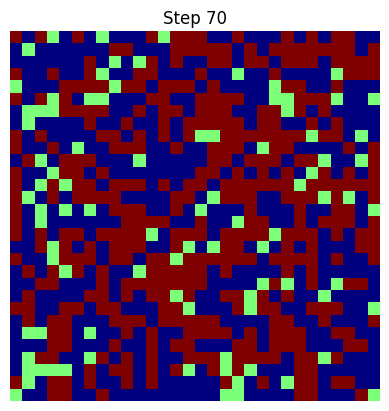

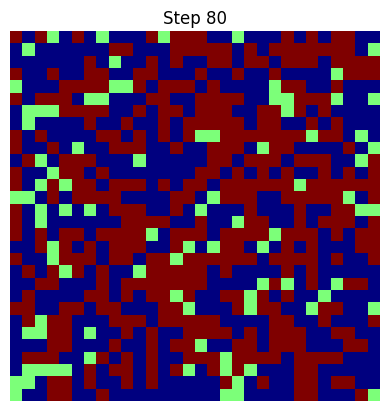

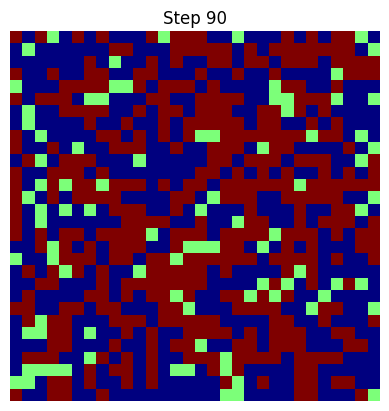

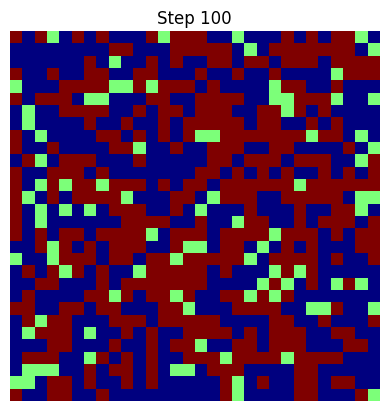

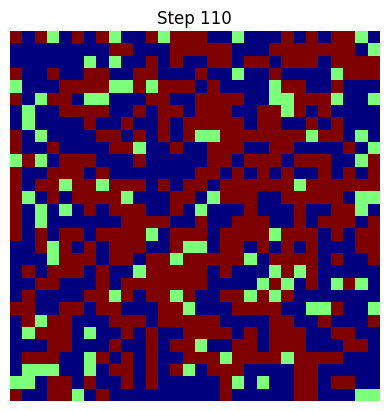

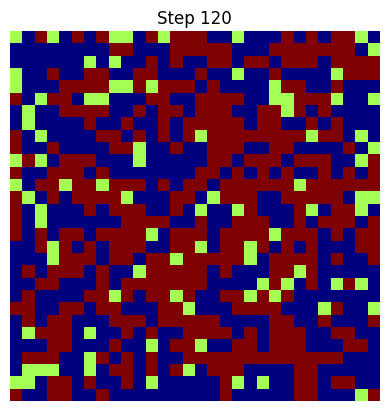

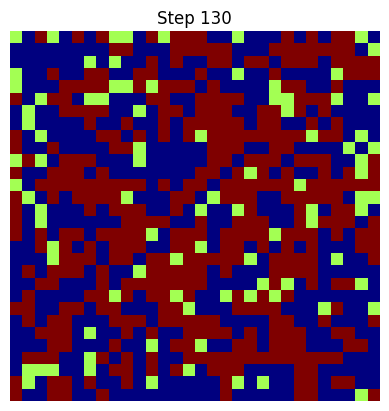

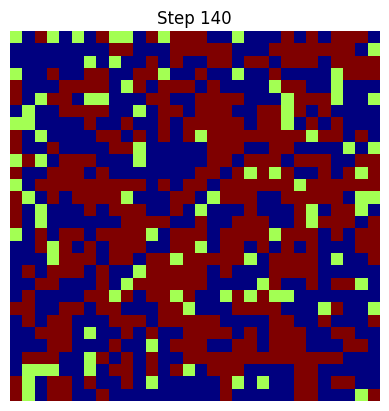

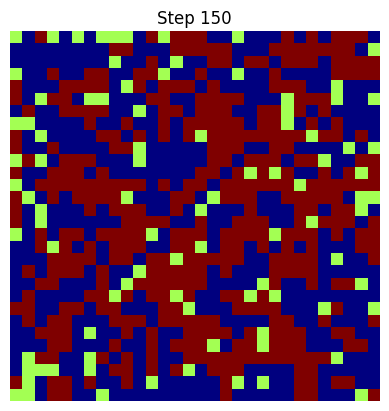

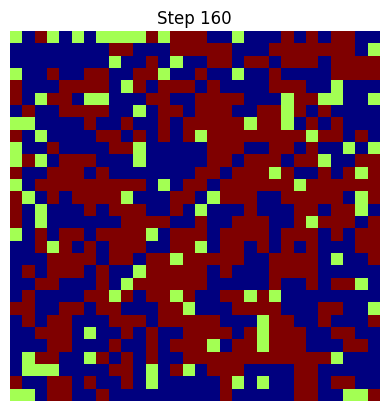

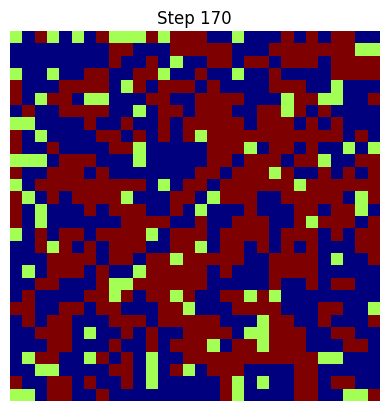

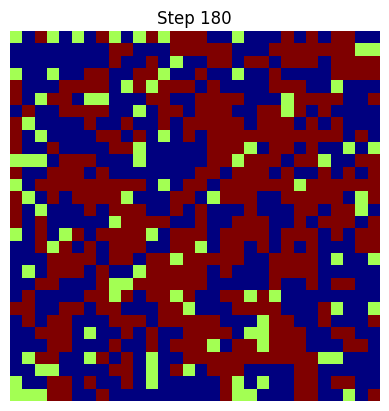

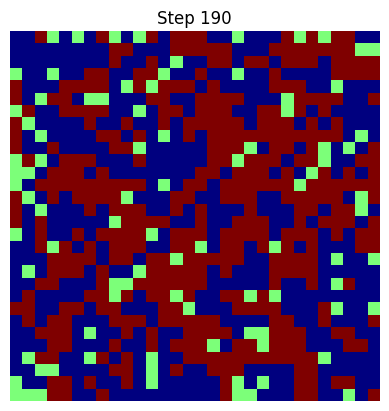

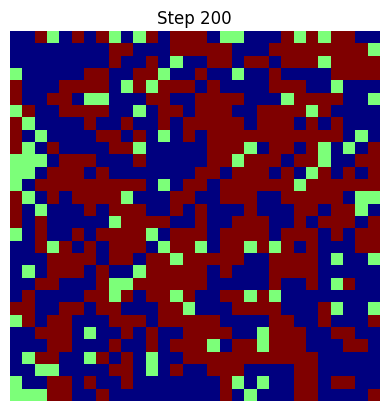

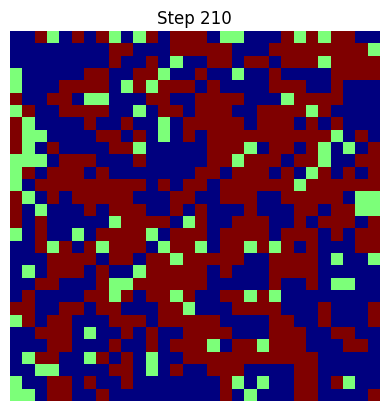

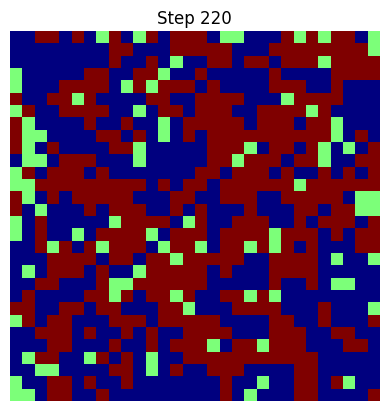

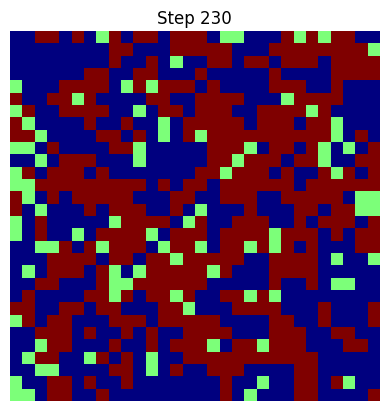

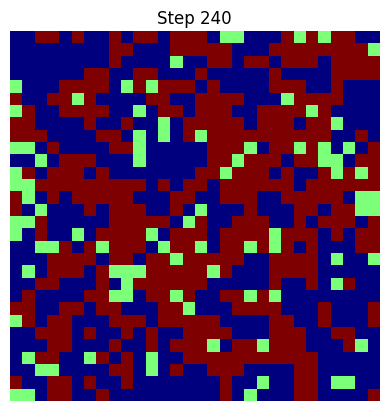

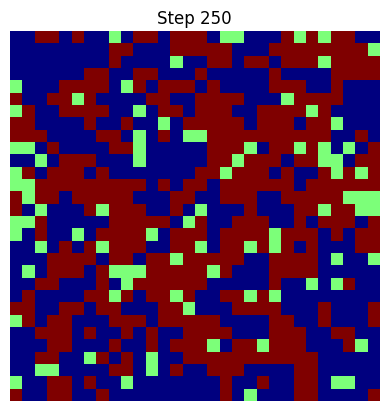

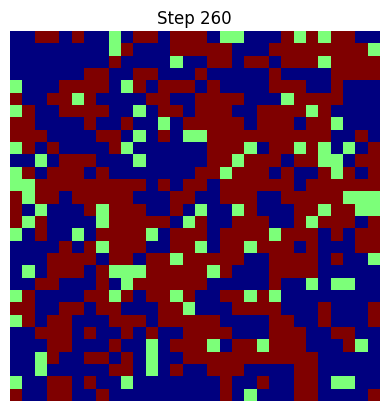

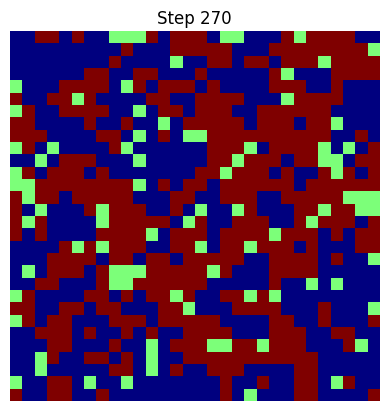

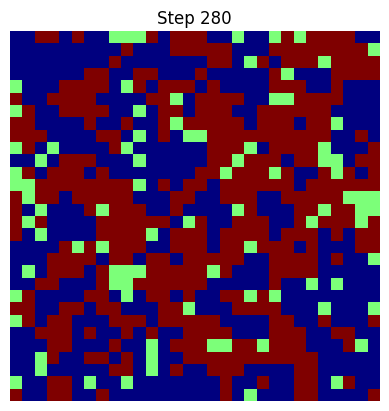

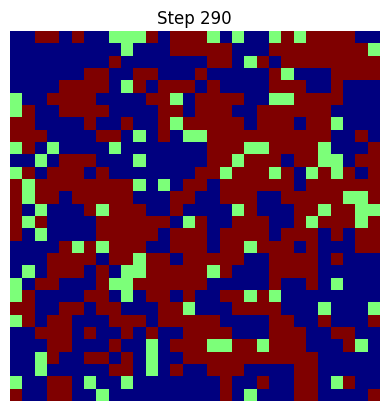

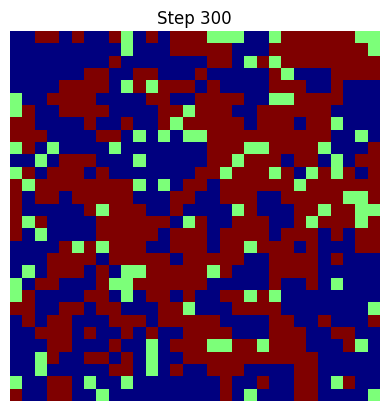

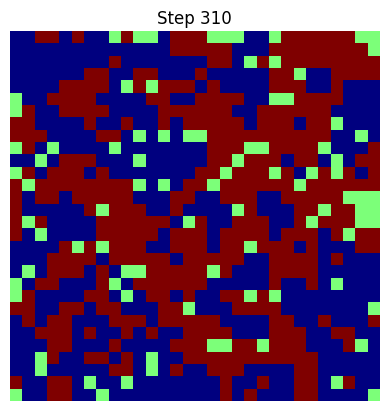

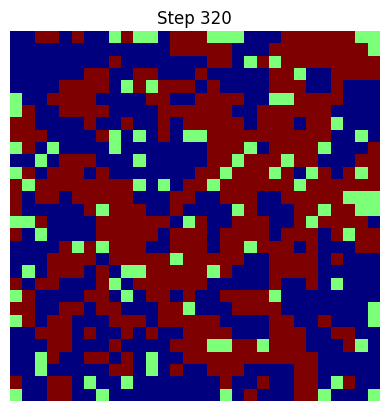

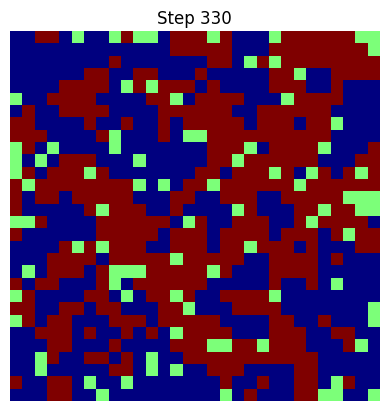

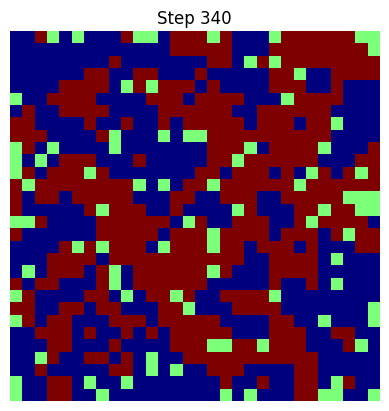

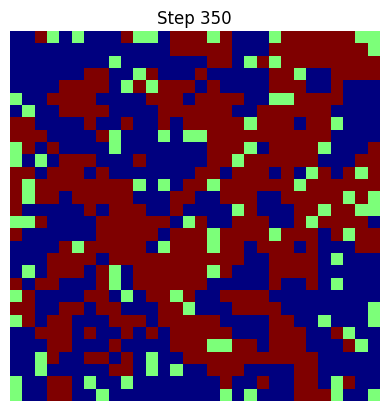

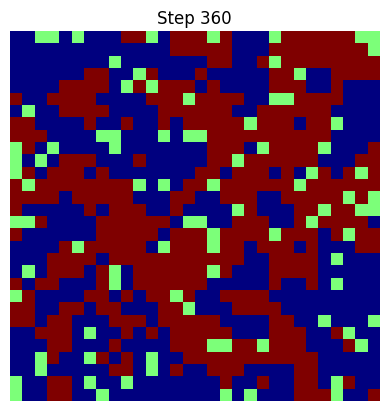

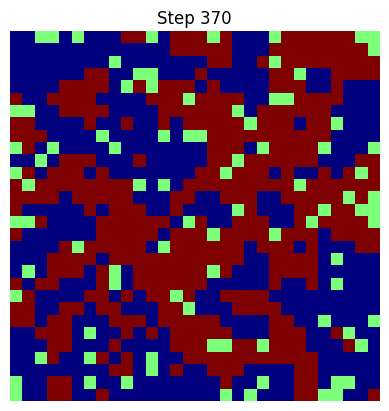

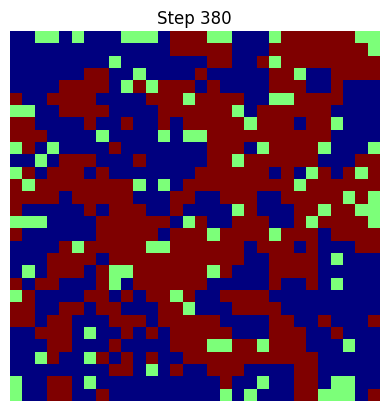

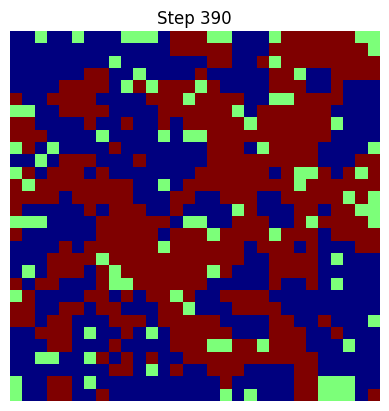

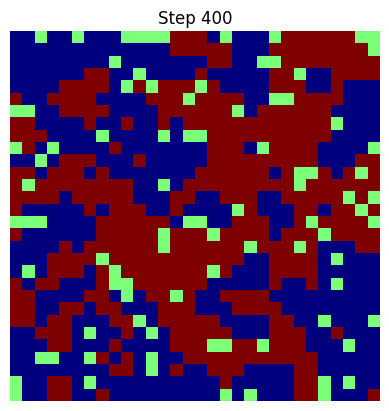

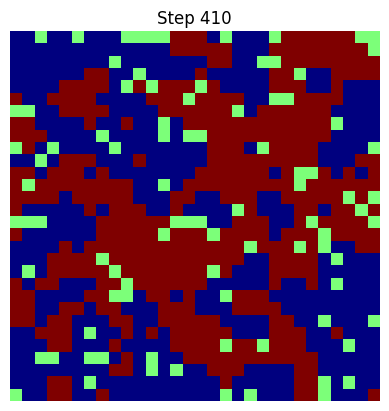

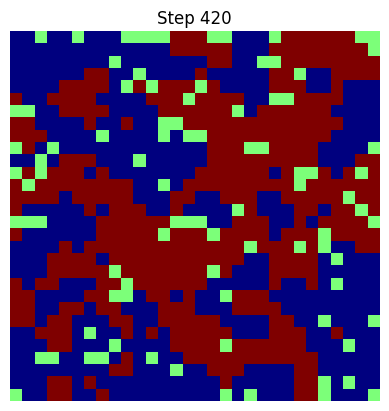

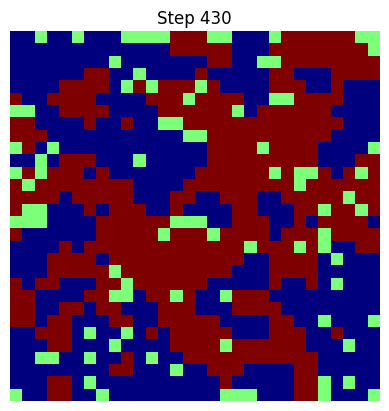

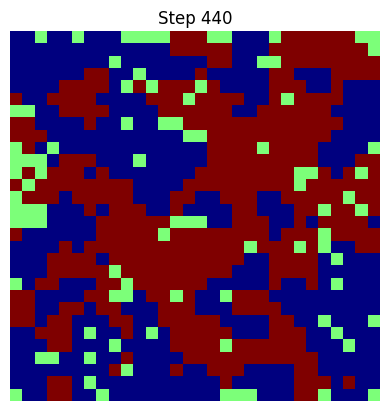

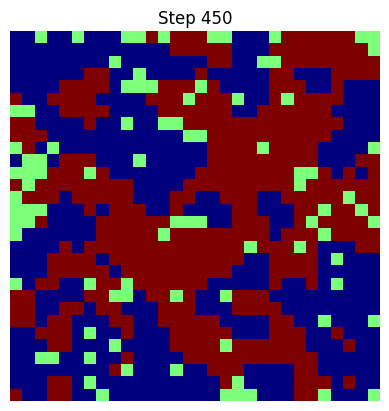

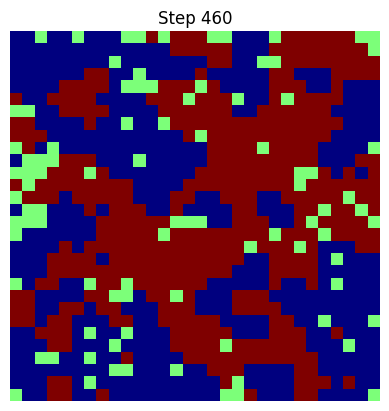

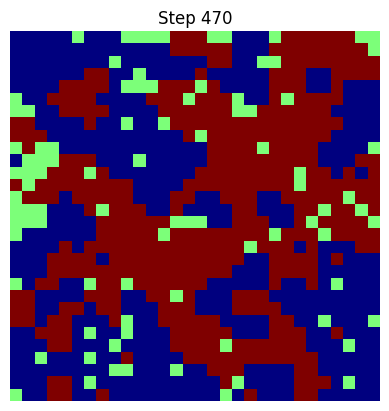

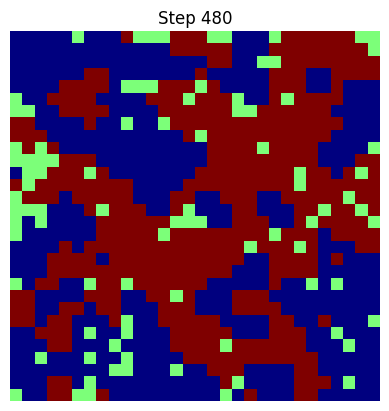

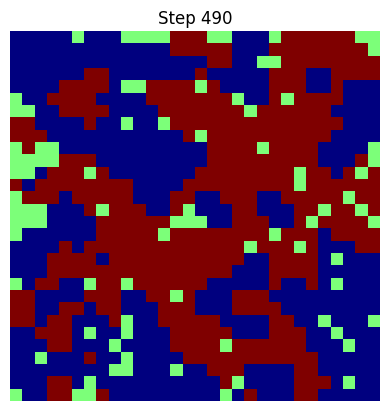

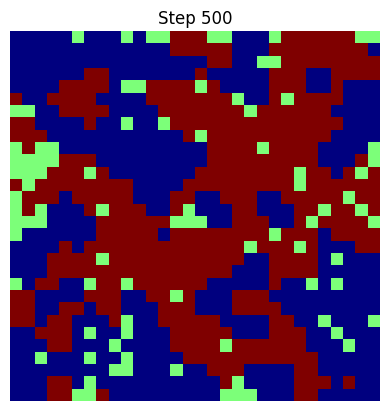

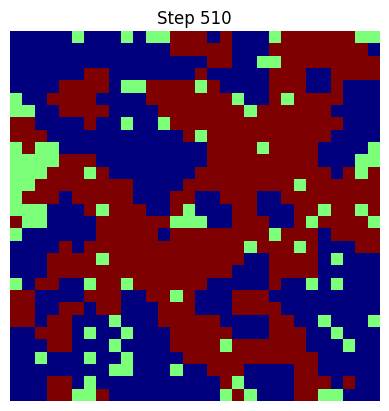

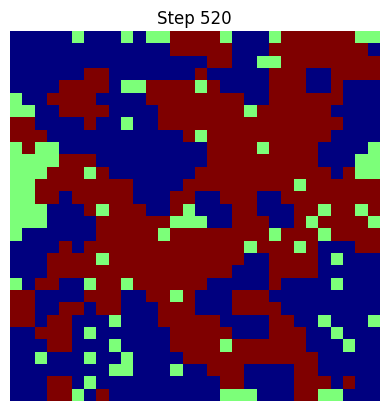

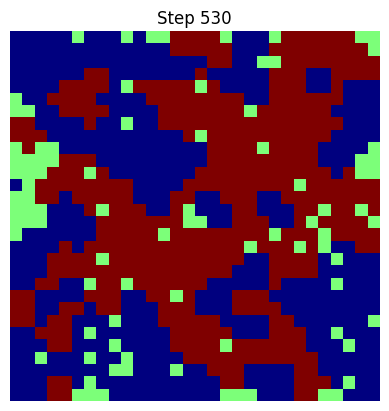

NO UNHAPPY CELLS


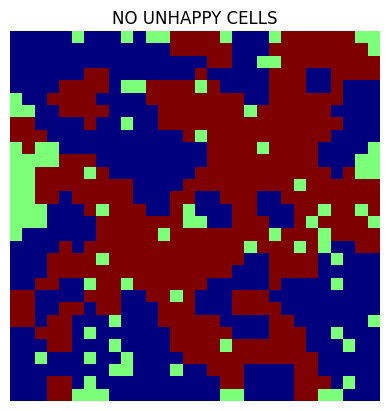

finished


In [8]:
n = 30
iters = 5000
step = 10
happy_neighbors = 3

grid = initialize_grid(n)
simulate(grid, iters, step, happy_neighbors)
print('finished')